<a href="https://colab.research.google.com/github/sheldonkemper/portfolio/blob/main/CAM_DS_301_Sentiment_analysis_and_text_classification_Activity_2_2_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 2.2.6 Sentiment analysis and text classification

In this activity, you will build a sentiment analysis model using Python and a data set of customer reviews. You will preprocess the data and fine-tune, evaluate, and test the model.


## Objective
In this activity, you will download a data set from Hugging Face and conduct text classification on it. Your objective is to analyse how different parameter choices affect the performance of a sentiment classifier.

You will complete this in your Notebook, where you will:

- create and train sentiment classifier RNN models
- evaluate model performance.



## Assessment criteria

By completing this activity, you will be able to provide evidence that you can:
*   apply various text preprocessing techniques and representation methods to preprocess and analyse textual data.
*   comprehend and implement different types of recurrent neural networks (RNNs) and understand their applications in NLP.
*   build and fine-tune advanced NLP models for specific natural language processing tasks.


## Activity guidance

1. Install the necessary packages that will be useful in this activity
2. Load the dataset sst5 from hugging face (https://huggingface.co/datasets/SetFit/sst5)

3. Create dataframes of the train and train split
4. Split the train dataframe into train and validation in the ratio of 8:2
5. Preprocess the dataset, set the maximum size to 200, vocabulary size to 30000
6. During tokenisation, mark out of vocabulary words as "[OOV]"
7. Pad your sequences with special tokens
8. Train a sentiment classifier on the dataset and compare different models for text classification
9.Train for 5 epochs
- Train with a vanilla RNN
- Train with an LSTM
- Is there any difference between a GRU and an LSTM?
- Train with a bidirectional LSTM
10. Comment on the performance of all the models


> Start your activity here. Select the pen from the toolbar to add your entry.

In [1]:
#In this activity, you will be required to download a dataset from huggingface and perfom the text classification on the the dataset
#You will be required to study the impact of different different parameter choices on the classification perfomance of sentiment classifier


#1. Install the necessary packages that will be useful in this  activity
#2. Load the dataset sst5 from hugginface (https://huggingface.co/datasets/SetFit/sst5)
#3.Create dataframes of the train and train split
#4 Split the train dataframe into train and validation in the ratio of 8:2
#5 Preprocess the dataset,  set the maximum size to 200, vocabulary size to 30000
#6. During tokenization, mark out of vocabulary words as "<OOV>"
#7 Pad your sequences with special tokens
#8. Train a sentiment classifier on the dataset and compare different models for text classification
# Train for 5 epochs
#    - Train with a vanilla RNN
#    - Train with an LSTM
#    - Is there any difference between a GRU and an LSTM?
#    - Train with a bidirectional LSTM
# Comment on the perfomance of all the models

## **Step 1: Install Necessary Packages**



In [2]:
!pip install transformers datasets tensorflow

## **Step 2: Load the Dataset from Hugging Face**

In [3]:
from datasets import load_dataset

# Load the sst5 dataset
dataset = load_dataset("SetFit/sst5")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Repo card metadata block was not found. Setting CardData to empty.


In [4]:
print(dataset['train'][0])


{'text': 'a stirring , funny and finally transporting re-imagining of beauty and the beast and 1930s horror films', 'label': 4, 'label_text': 'very positive'}


## **Step 3: Create DataFrames for Train and Test Splits**

In [5]:
import pandas as pd

# Convert train and test splits into DataFrames
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

In [6]:
# Display the first few rows of each DataFrame to confirm the conversion
print(train_df.head())
print(test_df.head())


                                                text  label     label_text
0  a stirring , funny and finally transporting re...      4  very positive
1  apparently reassembled from the cutting-room f...      1       negative
2  they presume their audience wo n't sit still f...      1       negative
3  the entire movie is filled with deja vu moments .      2        neutral
4  this is a visually stunning rumination on love...      3       positive
                                                text  label     label_text
0     no movement , no yuks , not much of anything .      1       negative
1  a gob of drivel so sickly sweet , even the eag...      0  very negative
2  ` how many more voyages can this limping but d...      2        neutral
3  so relentlessly wholesome it made me want to s...      2        neutral
4  gangs of new york is an unapologetic mess , wh...      0  very negative


## **Step 4: Split Train Data into Train and Validation (80:20)**

In [7]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)


In [8]:
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")

Training set size: 6835
Validation set size: 1709


In [9]:
# Check unique label values in each split
print("Unique labels in training set:", train_df['label'].unique())
print("Unique labels in validation set:", val_df['label'].unique())
print("Unique labels in test set:", test_df['label'].unique())


Unique labels in training set: [3 2 1 4 0]
Unique labels in validation set: [3 4 1 2 0]
Unique labels in test set: [1 0 2 4 3]


## **Step 5: Preprocess the Dataset**

Set the maximum sequence length to 200 and the vocabulary size to 30,000.

During tokenization, mark out-of-vocabulary (OOV) words as "[OOV]".

1. Tokenize: Use a tokenizer, such as one from the Hugging Face library, with a maximum length and OOV handling.
1. Padding: Add padding tokens to ensure each sequence is exactly 200 tokens long.

In [10]:
from transformers import AutoTokenizer

# Initialize the tokenizer with specific settings
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
max_len = 200  # Maximum sequence length
vocab_size = 30000  # Vocabulary size


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [11]:
# Test the tokenizer with an out-of-vocabulary word
sample_text = "This is a sample sentence with an oovwordtest that should be replaced."

# Tokenize the sample text
tokens = tokenizer(sample_text, max_length=max_len, padding="max_length", truncation=True)
print("Token IDs:", tokens['input_ids'])
print("Decoded Tokens:", tokenizer.convert_ids_to_tokens(tokens['input_ids']))



Token IDs: [101, 2023, 2003, 1037, 7099, 6251, 2007, 2019, 1051, 4492, 18351, 22199, 2008, 2323, 2022, 2999, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Decoded Tokens: ['[CLS]', 'this', 'is', 'a', 'sample', 'sentence', 'with', 'an', 'o', '##ov', '##word', '##test', 'that', 'should', 'be', 'replaced', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',

In [12]:
import tensorflow as tf # Import the TensorFlow library

# Tokenize and preprocess the dataset
def tokenize_and_encode(df):
    return tokenizer(
        df['text'].tolist(),
        max_length=max_len,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

# Tokenize and prepare inputs for each dataset
train_encodings = tokenize_and_encode(train_df)
val_encodings = tokenize_and_encode(val_df)
test_encodings = tokenize_and_encode(test_df)

# Convert labels to tensors
train_labels = tf.convert_to_tensor(train_df['label'].values)
val_labels = tf.convert_to_tensor(val_df['label'].values)
test_labels = tf.convert_to_tensor(test_df['label'].values)

# Create TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices(({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask']
}, train_labels)).batch(32)

val_dataset = tf.data.Dataset.from_tensor_slices(({
    'input_ids': val_encodings['input_ids'],
    'attention_mask': val_encodings['attention_mask']
}, val_labels)).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices(({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask']
}, test_labels)).batch(32)


In [13]:
# Print tokenized outputs for train_encodings
print("Sample input IDs:", train_encodings['input_ids'][0])
print("Sample attention mask:", train_encodings['attention_mask'][0])
print("Length of input IDs:", len(train_encodings['input_ids'][0]))


Sample input IDs: tf.Tensor(
[ 101 1010 1036 1036 2027 1005 2128 2041 2045  999 1005 1005  102    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0   

In [14]:
# Get a batch from the train dataset
for batch in train_dataset.take(1):
    inputs, labels = batch
    print("Input IDs shape:", inputs['input_ids'].shape)
    print("Attention mask shape:", inputs['attention_mask'].shape)
    print("Labels shape:", labels.shape)


Input IDs shape: (32, 200)
Attention mask shape: (32, 200)
Labels shape: (32,)


## **Step 6: Train a Sentiment Classifier and Compare Different Models**


Train for 5 Epochs

For each model, train on the preprocessed training data for 5 epochs.

Below are the steps for setting up each model type:

1. Vanilla RNN
1. LSTM
1. GRU (Compare its performance with LSTM)
1. Bidirectional LSTM


In [15]:
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Bidirectional, Dense

# Model and dataset parameters
vocab_size = 30000  # Defined earlier
embedding_dim = 300  # Embedding dimension
max_len = 200  # Maximum sequence length

In [16]:
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Bidirectional, Dense, Dropout

def create_model(rnn_type='VanillaRNN', dropout_rate=0.3):
    model = tf.keras.Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
    model.add(Dropout(dropout_rate))  # Add dropout after embedding layer

    # Add the RNN layer without return_sequences to get a single output
    if rnn_type == 'VanillaRNN':
        model.add(SimpleRNN(64))  # Remove `return_sequences=True`
    elif rnn_type == 'LSTM':
        model.add(LSTM(64))  # Remove `return_sequences=True`
    elif rnn_type == 'GRU':
        model.add(GRU(64))  # Remove `return_sequences=True`
    elif rnn_type == 'BidirectionalLSTM':
        model.add(Bidirectional(LSTM(64)))  # Remove `return_sequences=True`

    model.add(Dropout(dropout_rate))  # Dropout after RNN layer
    model.add(Dense(64, activation='relu'))  # Dense layer for extra learning capacity
    model.add(Dropout(dropout_rate))  # Dropout for Dense layer

    # Output layer for multi-class classification (5 classes)
    model.add(Dense(5, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [17]:
# Check the unique label values
print("Unique labels in training set:", train_labels.numpy())


Unique labels in training set: [3 2 3 ... 0 3 4]


In [18]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow as tf

# Convert train_labels to a NumPy array for compute_class_weight
train_labels_np = train_labels.numpy() if isinstance(train_labels, tf.Tensor) else train_labels

# Define class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels_np), y=train_labels_np)
class_weights = {i: weight for i, weight in enumerate(class_weights)}

print("Class Weights:", class_weights)


Class Weights: {0: 1.5516458569807037, 1: 0.7784738041002278, 2: 1.0356060606060606, 3: 0.7401191120736329, 4: 1.3258971871968963}


## **Step 7: Training and Evaluation**

In [19]:
# Create TensorFlow Datasets with only input_ids and labels
train_dataset = tf.data.Dataset.from_tensor_slices((train_encodings['input_ids'], train_labels)).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((val_encodings['input_ids'], val_labels)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((test_encodings['input_ids'], test_labels)).batch(32)


In [21]:
import matplotlib.pyplot as plt

# Define dictionary to store validation accuracies for each model
model_performance = {}

# Train and evaluate each model, storing validation accuracy
for model_type in ['VanillaRNN', 'LSTM', 'GRU', 'BidirectionalLSTM']:
    print(f"\nTraining {model_type} model...")
    model = create_model(rnn_type=model_type, dropout_rate=0.3)
    model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=5,
        class_weight=class_weights  # Applying the calculated class weights here
    )
    val_loss, val_accuracy = model.evaluate(val_dataset)
    model_performance[model_type] = val_accuracy  # Store validation accuracy
    print(f"{model_type} Validation Accuracy: {val_accuracy:.4f}")



Training VanillaRNN model...
Epoch 1/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 93s 369ms/step - accuracy: 0.1784 - loss: 1.6341 - val_accuracy: 0.1779 - val_loss: 1.6063
Epoch 2/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 66s 306ms/step - accuracy: 0.1927 - loss: 1.6222 - val_accuracy: 0.2779 - val_loss: 1.6057
Epoch 3/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 75s 273ms/step - accuracy: 0.1914 - loss: 1.6151 - val_accuracy: 0.1779 - val_loss: 1.6064
Epoch 4/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 89s 307ms/step - accuracy: 0.2060 - loss: 1.6166 - val_accuracy: 0.2779 - val_loss: 1.6049
Epoch 5/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 75s 273ms/step - accuracy: 0.2138 - loss: 1.6148 - val_accuracy: 0.1779 - val_loss: 1.6077
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.1838 - loss: 1.6080
VanillaRNN Validation Accuracy: 0.1779

Training LSTM model...
Epoch 1/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 113s 505ms/step - accuracy: 0.1767 - loss: 1.6179 - val_accuracy: 0.1779 - val_loss: 1.6053
Epoch 2/5
214/214 ━━━━━━━━━━━━━━━━━━━━ 143s 510ms/st

## **Step 9: Visualize the Performance of All Models**


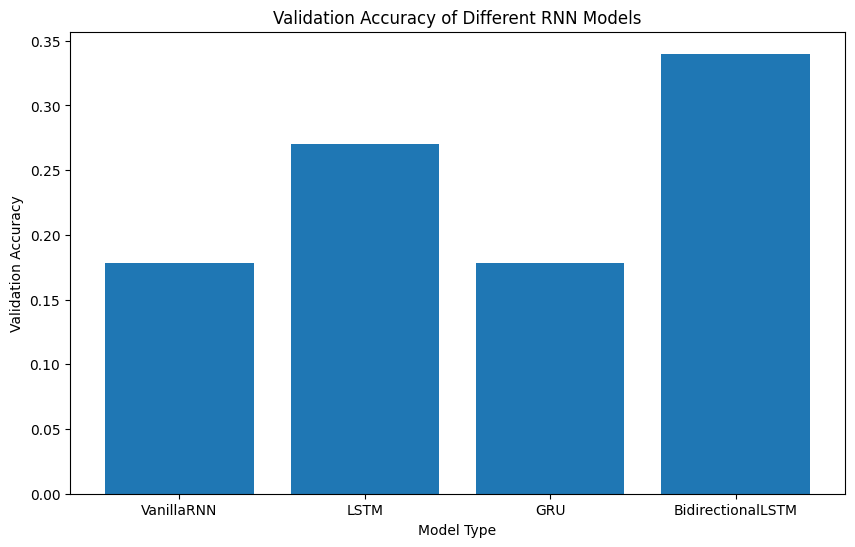

In [22]:
# Plotting the model performance
plt.figure(figsize=(10, 6))
plt.bar(model_performance.keys(), model_performance.values())
plt.xlabel("Model Type")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy of Different RNN Models")
plt.show()

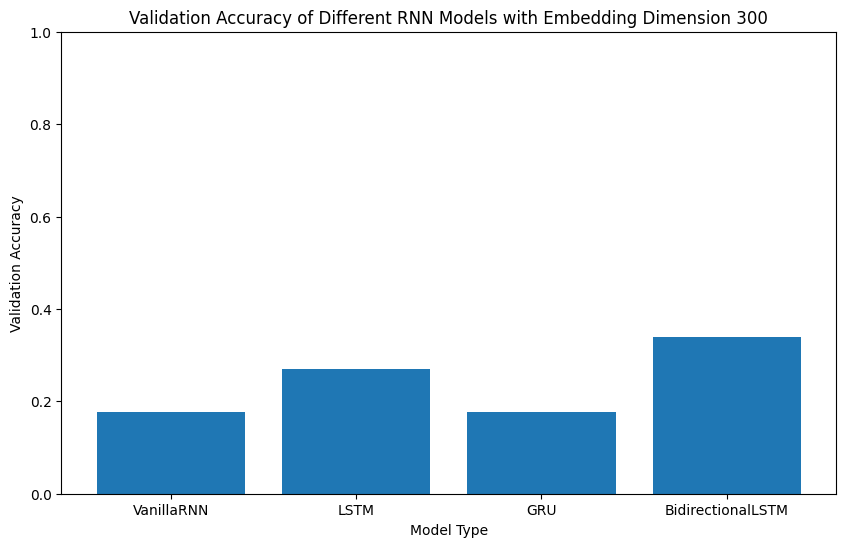

In [23]:
import matplotlib.pyplot as plt

# Model performance from the results you shared
model_performance = {
    'VanillaRNN': 0.1779,
    'LSTM': 0.2703,
    'GRU': 0.1779,
    'BidirectionalLSTM': 0.3400
}

# Plot the validation accuracy of each model
plt.figure(figsize=(10, 6))
plt.bar(model_performance.keys(), model_performance.values())
plt.xlabel("Model Type")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy of Different RNN Models with Embedding Dimension 300")
plt.ylim(0, 1)  # Scale y-axis from 0 to 1 for clarity
plt.show()
